In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# @Time    : 2020/1/13 16:28
# @Author  : Shark
# @Site    :
# @File    : tsts_trainer.py
# @Software: PyCharm

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf

print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# On CPU/GPU placement
config = tf.compat.v1.ConfigProto(allow_soft_placement=True, log_device_placement=True)
config.gpu_options.allow_growth = True
tf.compat.v1.Session(config=config)

2.0.0
Num GPUs Available:  1
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: TITAN RTX, pci bus id: 0000:05:00.0, compute capability: 7.5



In [2]:
from kashgari.trainer.sampler_multi_task_trainer import SamplerMultiTaskTrainer
from kashgari.task import ReadabilityTask, NerTask, AlluSourceTask,AlluClassTask
from kashgari.processors import ClassificationProcessor, LabelingProcessor

poem_seq_len = 30
task_list = []

processor = ClassificationProcessor(vocab_path="../pretrained_embedding/bert/poem_chinese_L-12_H-768_A-12/")
readability_task = ReadabilityTask(processor,
                                   "./allusion_corpus",
                                   poem_seq_len)
task_list.append(readability_task)

processor = LabelingProcessor(vocab_path="../pretrained_embedding/bert/poem_chinese_L-12_H-768_A-12/")
ner_task = NerTask(processor,
                   "./allusion_corpus",
                   poem_seq_len)
task_list.append(ner_task)

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: TITAN RTX, pci bus id: 0000:05:00.0, compute capability: 7.5



I:LOAD NER CORPUS:[ner_task.p: 65]:loaded 21596 samples from ./allusion_corpus/train.data. Samples:
x[0]: ['纶', '綍', '谋', '猷', '盛', ',', '丹', '青', '步', '武', '亲', '。']
y[0]: ['B-ALLU', 'I-ALLU', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


In [3]:
allu_def_seq_len = poem_seq_len
trainer = SamplerMultiTaskTrainer(task_list=task_list,
                                  batch_size=64,
                                  total_epochs=50,
                                  poem_seq_len=poem_seq_len,
                                  allu_def_seq_len=allu_def_seq_len)

final_res = trainer.train()

I:BASE TASK:[base_task.:270]:Task READABILITY:
I:BASE TASK:[base_task.:271]:	21 training batches
I:BASE TASK:[base_task.:272]:	4 validation batches
I:BASE TASK:[base_task.:273]:	6 test batches
I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	230 training batches
I:BASE TASK:[base_task.:272]:	41 validation batches
I:BASE TASK:[base_task.:273]:	68 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:0:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:NER's model_dir is ./model_ckpt/2020-02-06-10_23_22/0/NER-Naive_CRF_Model
I:BASE-MODEL:[base_model:232]:[NER]:train info:Train on 14684 samples, validate on 2592 samples
I:BASE-MODEL:[base_model:133]:READABILITY's model_dir is ./model_ckpt/2020-02-06-10_23_22/0/READABILITY-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[READABILITY]:train info:T

Epoch 1/50
251/251 [==============================] - 126s 502ms/step - task_name: READABILITY - loss: 0.8761 - accuracy: 0.5714 - val_loss: 0.8401 - val_accuracy: 0.6367 


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
251/251 [==============================] - 64s 254ms/step - task_name: READABILITY - loss: 0.5788 - accuracy: 0.6279 - val_loss: 0.7231 - val_accuracy: 0.6758


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
251/251 [==============================] - 66s 263ms/step - task_name: READABILITY - loss: 0.6334 - accuracy: 0.6760 - val_loss: 0.7271 - val_accuracy: 0.6914


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
251/251 [==============================] - 66s 265ms/step - task_name: READABILITY - loss: 0.4067 - accuracy: 0.7007 - val_loss: 0.7091 - val_accuracy: 0.7188


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
251/251 [==============================] - 66s 263ms/step - task_name: READABILITY - loss: 0.3329 - accuracy: 0.7315 - val_loss: 0.7133 - val_accuracy: 0.6953


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
251/251 [==============================] - 66s 264ms/step - task_name: READABILITY - loss: 0.5958 - accuracy: 0.7411 - val_loss: 0.7463 - val_accuracy: 0.7031


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
251/251 [==============================] - 66s 264ms/step - task_name: READABILITY - loss: 0.6106 - accuracy: 0.7676 - val_loss: 0.9694 - val_accuracy: 0.6328


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
250/251 [============================>.] - ETA: 0s - task_name: READABILITY - loss: 0.3395 - accuracy: 0.8094
Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
251/251 [==============================] - 63s 253ms/step - task_name: READABILITY - loss: 0.5894 - accuracy: 0.8083 - val_loss: 0.8085 - val_accuracy: 0.6758


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
251/251 [==============================] - 64s 254ms/step - task_name: READABILITY - loss: 0.5410 - accuracy: 0.8454 - val_loss: 0.7892 - val_accuracy: 0.7109


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
251/251 [==============================] - 5s 21ms/step - task_name: READABILITY - loss: 0.5486 - accuracy: 0.8062 - val_loss: 0.8782 - val_accuracy: 0.6875


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
247/251 [============================>.] - ETA: 0s - task_name: READABILITY - loss: 0.2831 - accuracy: 0.8533
Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
251/251 [==============================] - 5s 20ms/step - task_name: READABILITY - loss: 0.4232 - accuracy: 0.8533 - val_loss: 0.9240 - val_accuracy: 0.6875


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------NER LABEL METRICS -----------------------------------

epoch:labeling EPOCH accuracy 0.836987 precision: 0.473715, recall: 0.373553, f1: 0.417713

           precision    recall  f1-score   support

     ALLU     0.4739    0.3736    0.4178      4318

micro avg     0.4737    0.3736    0.4177      4318
macro avg     0.4739    0.3736    0.4178      4318

----------------------------------NER END ----------------------------------
train_example:**************************************************
x_seq:灌 园 何 其 鄙 , 皎 皎 於 陵 中 。
y_pred:B-ALLU I-ALLU O O O O O O O O O O
y_true:B-ALLU I-ALLU O O O O O O O O O O
----------
x_seq:五 湖 竟 负 他 年 志 , 百 战 空 垂 异 代 名 。
y_pred:B-ALLU I-ALLU O O O O O O O O O O O O O O
y_true:B-ALLU I-ALLU O O O O O O O O O O O O O O
----------
x_seq:大 底 [UNK] 鹏 须 自 适 , 何 尝 玉 石 不 同 焚 。
y_pred:O O B-ALLU I-ALLU O O O O O O O O O O O O
y_true:O O B-ALLU I-ALLU O O O O O O O O O O O O
----------
x_seq:玉 山 那 惜 醉 , 金 谷 已 无 春 。
y_pred:B-ALLU I-AL

I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 0th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************
I:BASE TASK:[base_task.:270]:Task READABILITY:
I:BASE TASK:[base_task.:271]:	21 training batches
I:BASE TASK:[base_task.:272]:	4 validation batches
I:BASE TASK:[base_task.:273]:	6 test batches


train_example:**************************************************
x_seq:燎 沉 香 ， 消 [UNK] 暑 。 鸟 雀 呼 晴 ， 侵 晓 窥 檐 语 。 叶 上 初 阳 干 宿 雨 、 水 面
y_pred:1
y_true:1
----------
x_seq:漫 漫 秋 夜 长 ， 烈 烈 北 风 凉 。 展 转 不 能 寐 ， 披 衣 起 彷 徨 。 彷 徨 忽 已 久
y_pred:1
y_true:1
----------
x_seq:日 居 月 诸 ， 照 临 下 土 。 乃 如 之 人 兮 ， 逝 不 古 处 ？ 胡 能 有 定 ？ 宁 不 我
y_pred:3
y_true:3
----------
x_seq:茅 檐 长 扫 净 无 苔 ， 花 木 成 畦 手 自 栽 。 一 水 护 田 将 绿 绕 ， 两 山 排 [UNK] 送
y_pred:1
y_true:1
----------
x_seq:千 里 黄 云 白 日 [UNK] ， 北 风 吹 雁 雪 纷 纷 。 莫 愁 前 路 无 知 己 ， 天 下 谁 人 不
y_pred:1
y_true:1
----------
x_seq:梁 惠 王 曰 ： [UNK] 寡 人 之 于 国 也 ， 尽 心 焉 耳 矣 。 河 内 凶 ， 则 移 其 民 于 河
y_pred:3
y_true:3
----------
x_seq:男 声 欣 欣 女 颜 悦 ， 人 家 不 怨 言 语 别 。 五 月 虽 热 麦 风 清 ， 檐 头 索 索 [UNK]
y_pred:1
y_true:2
----------
x_seq:晨 趋 紫 禁 中 ， 夕 待 金 门 诏 。 观 书 散 遗 [UNK] ， 探 古 穷 至 妙 。 片 言 苟 会 心
y_pred:2
y_true:2
----------
x_seq:山 寺 钟 鸣 昼 已 昏 ， 渔 梁 渡 头 争 渡 喧 。 人 随 沙 岸 向 江 村 ， 余 亦 乘 舟 归
y_pred:1
y_true:2
----------
x_seq:花 亦 无 知 ， 月 亦 无 聊 ， 酒 亦 无 灵 。 把 夭 桃 斫 断 ， 煞 他 风 景 ； 鹦 哥 煮
y_pred:2
y

I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	230 training batches
I:BASE TASK:[base_task.:272]:	41 validation batches
I:BASE TASK:[base_task.:273]:	68 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:1:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:NER's model_dir is ./model_ckpt/2020-02-06-10_23_22/1/NER-Naive_CRF_Model
I:BASE-MODEL:[base_model:232]:[NER]:train info:Train on 14684 samples, validate on 2592 samples
I:BASE-MODEL:[base_model:133]:READABILITY's model_dir is ./model_ckpt/2020-02-06-10_23_22/1/READABILITY-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[READABILITY]:train info:Train on 1301 samples, validate on 230 samples


Epoch 1/50
251/251 [==============================] - 126s 503ms/step - task_name: READABILITY - loss: 0.9801 - accuracy: 0.5362 - val_loss: 0.7345 - val_accuracy: 0.6562 


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
251/251 [==============================] - 63s 252ms/step - task_name: READABILITY - loss: 0.6262 - accuracy: 0.6536 - val_loss: 0.6679 - val_accuracy: 0.7305 


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
251/251 [==============================] - 63s 251ms/step - task_name: READABILITY - loss: 0.7569 - accuracy: 0.7131 - val_loss: 0.6723 - val_accuracy: 0.7070


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
251/251 [==============================] - 63s 253ms/step - task_name: READABILITY - loss: 0.7817 - accuracy: 0.7422 - val_loss: 0.7593 - val_accuracy: 0.7148


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
250/251 [============================>.] - ETA: 0s - task_name: READABILITY - loss: 0.4578 - accuracy: 0.7683
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
251/251 [==============================] - 64s 255ms/step - task_name: READABILITY - loss: 0.7297 - accuracy: 0.7683 - val_loss: 0.7723 - val_accuracy: 0.7070


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
251/251 [==============================] - 64s 255ms/step - task_name: READABILITY - loss: 0.4832 - accuracy: 0.7984 - val_loss: 0.7533 - val_accuracy: 0.7109


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
251/251 [==============================] - 63s 253ms/step - task_name: READABILITY - loss: 0.4970 - accuracy: 0.8294 - val_loss: 0.7221 - val_accuracy: 0.7305


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
251/251 [==============================] - 64s 255ms/step - task_name: READABILITY - loss: 0.3574 - accuracy: 0.8377 - val_loss: 0.7384 - val_accuracy: 0.7422


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
251/251 [==============================] - 64s 256ms/step - task_name: READABILITY - loss: 0.2784 - accuracy: 0.8479 - val_loss: 0.8060 - val_accuracy: 0.6992


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
251/251 [==============================] - 65s 260ms/step - task_name: READABILITY - loss: 0.4286 - accuracy: 0.8575 - val_loss: 0.8537 - val_accuracy: 0.7031


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
251/251 [==============================] - 66s 261ms/step - task_name: READABILITY - loss: 0.3121 - accuracy: 0.8758 - val_loss: 0.8656 - val_accuracy: 0.7188


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 12/50
250/251 [============================>.] - ETA: 0s - task_name:     NER     - loss: 2.2186 - accuracy: 0.8390
Epoch 00012: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
251/251 [==============================] - 63s 251ms/step - task_name: READABILITY - loss: 0.4150 - accuracy: 0.9005 - val_loss: 0.8979 - val_accuracy: 0.6758


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 13/50
251/251 [==============================] - 66s 262ms/step - task_name: READABILITY - loss: 0.2769 - accuracy: 0.9130 - val_loss: 0.8977 - val_accuracy: 0.6758


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 14/50
251/251 [==============================] - 4s 17ms/step - task_name: READABILITY - loss: 0.2840 - accuracy: 0.8992 - val_loss: 0.8723 - val_accuracy: 0.6797


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 15/50
251/251 [==============================] - 6s 23ms/step - task_name: READABILITY - loss: 0.3415 - accuracy: 0.9016 - val_loss: 0.9149 - val_accuracy: 0.7031


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------NER LABEL METRICS -----------------------------------

epoch:labeling EPOCH accuracy 0.822935 precision: 0.435897, recall: 0.413386, f1: 0.424343

           precision    recall  f1-score   support

     ALLU     0.4360    0.4134    0.4244      4318

micro avg     0.4359    0.4134    0.4243      4318
macro avg     0.4360    0.4134    0.4244      4318

----------------------------------NER END ----------------------------------
train_example:**************************************************
x_seq:长 房 萸 早 熟 , 彭 泽 菊 初 收 。
y_pred:O O O O O O B-ALLU I-ALLU O O O O
y_true:B-ALLU I-ALLU I-ALLU O O O O O O O O O
----------
x_seq:郑 公 [UNK] 散 鬓 成 丝 , 酒 后 常 称 老 画 师 。
y_pred:B-ALLU I-ALLU I-ALLU I-ALLU O O O O O O O O O O O O
y_true:O O B-ALLU I-ALLU O O O O O O O O O O O O
----------
x_seq:辞 辇 复 当 熊 , 倾 心 奉 六 宫 。
y_pred:O O O B-ALLU I-ALLU O O O O O O O
y_true:O O O B-ALLU I-ALLU O O O O O O O
----------
x_seq:才 施 偃 月 行 军 令 , 便 见 台 星 逼 座 隅 。
y_pred:O O B-ALLU I

I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 1th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************
I:BASE TASK:[base_task.:270]:Task READABILITY:
I:BASE TASK:[base_task.:271]:	21 training batches
I:BASE TASK:[base_task.:272]:	4 validation batches
I:BASE TASK:[base_task.:273]:	6 test batches


train_example:**************************************************
x_seq:辞 宗 盛 荆 梦 ， 登 歌 美 [UNK] 绎 。 徒 收 杞 梓 饶 ， 曾 非 羽 人 宅 。 罗 景 蔼 云 [UNK]
y_pred:3
y_true:3
----------
x_seq:女 曰 鸡 鸣 ， 士 曰 昧 旦 。 子 兴 视 夜 ， 明 星 有 烂 。 将 翱 将 翔 ， 弋 [UNK] 与 雁
y_pred:3
y_true:3
----------
x_seq:重 冈 已 隔 红 尘 断 ， 村 落 更 年 丰 。 移 居 要 就 ， 窗 中 远 岫 ， 舍 后 长 松 。
y_pred:1
y_true:2
----------
x_seq:行 向 石 栏 立 ， 清 寒 不 可 云 。 流 来 桥 下 水 ， 半 是 洞 中 云 。 欲 住 逢 年 尽
y_pred:1
y_true:1
----------
x_seq:九 州 生 气 恃 风 雷 ， 万 马 齐 [UNK] 究 可 哀 。 我 劝 天 公 重 抖 擞 ， 不 拘 一 格 降
y_pred:2
y_true:2
----------
x_seq:君 家 全 盛 日 ， 台 鼎 何 陆 离 ！ 斩 鳌 翼 娲 皇 ， 炼 石 补 天 维 。 一 回 日 月 顾
y_pred:2
y_true:3
----------
x_seq:细 雨 湿 流 光 ， 芳 草 年 年 与 恨 长 。 烟 锁 凤 楼 无 限 事 ， 茫 茫 。 鸾 镜 鸳 衾
y_pred:2
y_true:2
----------
x_seq:羊 续 高 高 挂 起 ， 冯 苦 苦 伤 悲 。 大 海 边 ， 长 江 内 ， 多 少 渔 矶 ？ 记 得 荆
y_pred:1
y_true:1
----------
x_seq:鸿 雁 出 塞 北 ， 乃 在 无 人 乡 。 举 翅 万 馀 里 ， 行 止 自 成 行 。 冬 节 食 南 稻
y_pred:1
y_true:2
----------
x_seq:落 花 如 梦 凄 迷 ， 麝 烟 微 ， 又 是 夕 阳 潜 下 小 楼 西 。 愁 无 限 ， 消 瘦 尽 ，
y_pred:1
y_true:1


I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	230 training batches
I:BASE TASK:[base_task.:272]:	41 validation batches
I:BASE TASK:[base_task.:273]:	68 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:2:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:NER's model_dir is ./model_ckpt/2020-02-06-10_23_22/2/NER-Naive_CRF_Model
I:BASE-MODEL:[base_model:232]:[NER]:train info:Train on 14684 samples, validate on 2592 samples
I:BASE-MODEL:[base_model:133]:READABILITY's model_dir is ./model_ckpt/2020-02-06-10_23_22/2/READABILITY-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[READABILITY]:train info:Train on 1301 samples, validate on 230 samples


Epoch 1/50
251/251 [==============================] - 125s 499ms/step - task_name: READABILITY - loss: 1.1823 - accuracy: 0.5804 - val_loss: 0.7035 - val_accuracy: 0.6797 


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
251/251 [==============================] - 63s 251ms/step - task_name: READABILITY - loss: 0.6910 - accuracy: 0.6897 - val_loss: 0.7125 - val_accuracy: 0.6953 


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
251/251 [==============================] - 64s 254ms/step - task_name: READABILITY - loss: 0.8011 - accuracy: 0.7465 - val_loss: 0.6760 - val_accuracy: 0.7070 


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
251/251 [==============================] - 66s 262ms/step - task_name: READABILITY - loss: 0.6557 - accuracy: 0.7539 - val_loss: 0.8145 - val_accuracy: 0.6680 


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
251/251 [==============================] - 66s 262ms/step - task_name: READABILITY - loss: 0.6322 - accuracy: 0.7643 - val_loss: 0.8000 - val_accuracy: 0.6641 


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
251/251 [==============================] - 63s 252ms/step - task_name: READABILITY - loss: 0.6205 - accuracy: 0.8131 - val_loss: 0.7157 - val_accuracy: 0.6992 


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
251/251 [==============================] - 64s 255ms/step - task_name: READABILITY - loss: 0.4268 - accuracy: 0.8273 - val_loss: 0.7145 - val_accuracy: 0.7109 


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
251/251 [==============================] - 63s 253ms/step - task_name: READABILITY - loss: 0.4030 - accuracy: 0.8467 - val_loss: 0.7473 - val_accuracy: 0.6836 


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
251/251 [==============================] - 64s 254ms/step - task_name: READABILITY - loss: 0.4457 - accuracy: 0.8398 - val_loss: 0.7492 - val_accuracy: 0.6914


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
251/251 [==============================] - 64s 255ms/step - task_name: READABILITY - loss: 0.3067 - accuracy: 0.8797 - val_loss: 0.7500 - val_accuracy: 0.7188


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
251/251 [==============================] - 5s 21ms/step - task_name: READABILITY - loss: 0.4658 - accuracy: 0.8576 - val_loss: 0.8037 - val_accuracy: 0.7188


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 12/50
251/251 [==============================] - 5s 19ms/step - task_name: READABILITY - loss: 0.3176 - accuracy: 0.8928 - val_loss: 0.8024 - val_accuracy: 0.7227


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 13/50
251/251 [==============================] - 4s 17ms/step - task_name: READABILITY - loss: 0.2384 - accuracy: 0.9242 - val_loss: 0.8174 - val_accuracy: 0.7266


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 14/50
251/251 [==============================] - 4s 15ms/step - task_name: READABILITY - loss: 0.1926 - accuracy: 0.9358 - val_loss: 0.8040 - val_accuracy: 0.7109


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 15/50
251/251 [==============================] - 6s 26ms/step - task_name: READABILITY - loss: 0.2857 - accuracy: 0.9458 - val_loss: 1.0105 - val_accuracy: 0.6758


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 16/50
251/251 [==============================] - 4s 17ms/step - task_name: READABILITY - loss: 0.1586 - accuracy: 0.9531 - val_loss: 1.0493 - val_accuracy: 0.6641


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 17/50
251/251 [==============================] - 3s 12ms/step - task_name: READABILITY - loss: 0.1023 - accuracy: 0.9520 - val_loss: 1.0470 - val_accuracy: 0.6641


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 18/50
251/251 [==============================] - 5s 22ms/step - task_name: READABILITY - loss: 0.1053 - accuracy: 0.9563 - val_loss: 1.2359 - val_accuracy: 0.6602


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 19/50
251/251 [==============================] - 5s 20ms/step - task_name: READABILITY - loss: 0.2172 - accuracy: 0.9413 - val_loss: 0.9415 - val_accuracy: 0.7031


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 20/50
248/251 [============================>.] - ETA: 0s - task_name: READABILITY - loss: 0.1240 - accuracy: 0.9325
Epoch 00020: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
251/251 [==============================] - 8s 30ms/step - task_name: READABILITY - loss: 0.2275 - accuracy: 0.9333 - val_loss: 1.4570 - val_accuracy: 0.6211


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------NER LABEL METRICS -----------------------------------

epoch:labeling EPOCH accuracy 0.822956 precision: 0.323396, recall: 0.231286, f1: 0.269693

           precision    recall  f1-score   support

     ALLU     0.3240    0.2313    0.2699      4315

micro avg     0.3234    0.2313    0.2697      4315
macro avg     0.3240    0.2313    0.2699      4315

----------------------------------NER END ----------------------------------
train_example:**************************************************
x_seq:蹉 跎 潘 鬓 至 , 蹭 蹬 阮 途 穷 。
y_pred:O O B-ALLU O O O O O B-ALLU O O O
y_true:O O O O O O O O B-ALLU I-ALLU O O
----------
x_seq:翟 汤 隐 操 , 许 询 胜 具 。
y_pred:O O O O O B-ALLU O O O O
y_true:O O O O O B-ALLU I-ALLU I-ALLU I-ALLU O
----------
x_seq:阆 风 入 辙 迹 , 旷 原 延 冥 搜 。
y_pred:O O O O O O O O O O O O
y_true:B-ALLU I-ALLU O O O O O O O O O O
----------
x_seq:茂 陵 罢 酒 惭 中 圣 , 漳 浦 题 诗 怯 大 巫 。
y_pred:O O O O O O O O O O O O O O O O
y_true:O O O O O B-ALLU I-ALLU O O O O O

I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 2th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************
I:BASE TASK:[base_task.:270]:Task READABILITY:
I:BASE TASK:[base_task.:271]:	21 training batches
I:BASE TASK:[base_task.:272]:	4 validation batches
I:BASE TASK:[base_task.:273]:	6 test batches


train_example:**************************************************
x_seq:宛 彼 鸣 鸠 ， 翰 飞 戾 天 。 我 心 忧 伤 ， 念 昔 先 人 。 明 发 不 寐 ， 有 怀 二 人
y_pred:3
y_true:3
----------
x_seq:青 山 隐 隐 水 迢 迢 ， 秋 尽 江 南 草 未 凋 。 二 十 四 桥 明 月 夜 ， 玉 人 何 处 教
y_pred:1
y_true:1
----------
x_seq:百 叶 双 桃 晚 更 红 ， 窥 窗 映 竹 见 玲 珑 。 应 知 侍 史 归 天 上 ， 故 伴 仙 郎 宿
y_pred:1
y_true:2
----------
x_seq:生 涯 岂 料 承 优 诏 ， 世 事 空 知 学 醉 歌 。 江 上 月 明 胡 雁 过 ， 淮 南 木 落 楚
y_pred:1
y_true:2
----------
x_seq:有 [UNK] 者 弁 ， 实 维 伊 何 ？ 尔 酒 既 旨 ， 尔 肴 既 嘉 。 岂 伊 异 人 ？ 兄 弟 匪 他
y_pred:3
y_true:3
----------
x_seq:下 床 着 新 衣 ， 初 学 小 姑 拜 。 低 头 羞 见 人 ， 双 手 结 裙 带 。 [UNK] [PAD] [PAD] [PAD] [PAD]
y_pred:1
y_true:1
----------
x_seq:共 骇 群 龙 水 上 游 ， 不 知 原 是 木 兰 舟 。 云 旗 猎 猎 翻 青 汉 ， 雷 鼓 嘈 嘈 殷
y_pred:1
y_true:1
----------
x_seq:牛 羊 散 漫 落 日 下 ， 野 草 生 香 乳 酪 甜 。 卷 地 朔 风 沙 似 雪 ， 家 家 行 帐 下
y_pred:1
y_true:1
----------
x_seq:冰 雪 林 中 著 此 身 ， 不 同 桃 李 混 芳 尘 。 忽 然 一 夜 清 香 发 ， 散 作 乾 坤 万
y_pred:1
y_true:1
----------
x_seq:司 马 错 与 张 仪 争 论 于 秦 惠 王 前 ， 司 马 错 欲 伐 蜀 ， 张 仪 曰 ： [UNK] 不 如 伐
y_pred

I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	230 training batches
I:BASE TASK:[base_task.:272]:	41 validation batches
I:BASE TASK:[base_task.:273]:	68 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:3:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:NER's model_dir is ./model_ckpt/2020-02-06-10_23_22/3/NER-Naive_CRF_Model
I:BASE-MODEL:[base_model:232]:[NER]:train info:Train on 14684 samples, validate on 2592 samples
I:BASE-MODEL:[base_model:133]:READABILITY's model_dir is ./model_ckpt/2020-02-06-10_23_22/3/READABILITY-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[READABILITY]:train info:Train on 1301 samples, validate on 230 samples


Epoch 1/50
251/251 [==============================] - 123s 489ms/step - task_name: READABILITY - loss: 0.8178 - accuracy: 0.5576 - val_loss: 0.8126 - val_accuracy: 0.6641 


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
251/251 [==============================] - 65s 261ms/step - task_name: READABILITY - loss: 0.7951 - accuracy: 0.6071 - val_loss: 0.7862 - val_accuracy: 0.6523 


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
251/251 [==============================] - 64s 254ms/step - task_name: READABILITY - loss: 0.6637 - accuracy: 0.6758 - val_loss: 0.7476 - val_accuracy: 0.6914 


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
251/251 [==============================] - 65s 257ms/step - task_name: READABILITY - loss: 0.4356 - accuracy: 0.7020 - val_loss: 0.7659 - val_accuracy: 0.6562 


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
251/251 [==============================] - 67s 265ms/step - task_name: READABILITY - loss: 0.9037 - accuracy: 0.7319 - val_loss: 0.9407 - val_accuracy: 0.6328 


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
251/251 [==============================] - 64s 255ms/step - task_name: READABILITY - loss: 0.4179 - accuracy: 0.7686 - val_loss: 0.7980 - val_accuracy: 0.6719 


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
251/251 [==============================] - 64s 254ms/step - task_name: READABILITY - loss: 0.4697 - accuracy: 0.7681 - val_loss: 0.7802 - val_accuracy: 0.6641 


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
251/251 [==============================] - 64s 255ms/step - task_name: READABILITY - loss: 0.3505 - accuracy: 0.7927 - val_loss: 0.8699 - val_accuracy: 0.6602 


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
251/251 [==============================] - 64s 254ms/step - task_name: READABILITY - loss: 0.4317 - accuracy: 0.8008 - val_loss: 0.8166 - val_accuracy: 0.6758 


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
251/251 [==============================] - 63s 253ms/step - task_name: READABILITY - loss: 0.5121 - accuracy: 0.8382 - val_loss: 0.8596 - val_accuracy: 0.6641 


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
251/251 [==============================] - 59s 235ms/step - task_name:     NER     - loss: 2.8164 - accuracy: 0.8219 - val_loss: 12.9777 - val_accuracy: 0.2949


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------NER LABEL METRICS -----------------------------------

epoch:labeling EPOCH accuracy 0.817675 precision: 0.372800, recall: 0.053960, f1: 0.094275

           precision    recall  f1-score   support

     ALLU     0.3746    0.0540    0.0943      4318

micro avg     0.3728    0.0540    0.0943      4318
macro avg     0.3746    0.0540    0.0943      4318

----------------------------------NER END ----------------------------------
train_example:**************************************************
x_seq:林 壑 能 忘 轩 冕 贵 , 白 云 黄 鹤 好 相 亲 。
y_pred:O O O O O O O O O O O O O O O O
y_true:O O O O B-ALLU I-ALLU O O O O O O O O O O
----------
x_seq:刘 桢 徒 有 气 , 管 [UNK] 独 无 年 。
y_pred:O O O O O O O O O O O O
y_true:B-ALLU I-ALLU I-ALLU I-ALLU I-ALLU O O O O O O O
----------
x_seq:献 芹 则 小 小 , 荐 藻 明 区 区 。
y_pred:O O O O O O O O O O O O
y_true:B-ALLU I-ALLU O O O O O O O O O O
----------
x_seq:还 乘 郑 小 驷 , [UNK] [UNK] 县 城 阴 。
y_pred:O O O O O O O O O O O O
y_true:O O B-ALLU 

I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 3th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************
I:BASE TASK:[base_task.:270]:Task READABILITY:
I:BASE TASK:[base_task.:271]:	21 training batches
I:BASE TASK:[base_task.:272]:	4 validation batches
I:BASE TASK:[base_task.:273]:	6 test batches


train_example:**************************************************
x_seq:古 人 学 问 无 遗 力 ， 少 壮 工 夫 老 始 成 。 纸 上 得 来 终 觉 浅 ， 绝 知 此 事 要
y_pred:1
y_true:1
----------
x_seq:金 锁 重 门 荒 苑 静 ， 绮 窗 愁 对 秋 空 。 翠 华 一 去 寂 无 踪 。 玉 楼 歌 吹 ， 声
y_pred:1
y_true:1
----------
x_seq:五 月 五 日 午 ， 赠 我 一 枝 艾 。 故 人 不 可 见 ， 新 知 万 里 外 。 丹 心 照 夙 昔
y_pred:1
y_true:1
----------
x_seq:杨 花 扑 帐 春 云 热 ， 龟 甲 屏 风 醉 眼 [UNK] 。 东 家 胡 蝶 西 家 飞 ， 白 骑 少 年 今
y_pred:1
y_true:1
----------
x_seq:炉 火 照 天 地 ， 红 星 乱 紫 烟 。 赧 郎 明 月 夜 ， 歌 曲 动 寒 川 。 [UNK] [PAD] [PAD] [PAD] [PAD]
y_pred:1
y_true:1
----------
x_seq:岂 是 从 容 唱 渭 城 ， 个 中 当 有 不 平 鸣 。 可 怜 日 晏 忍 饥 面 ， 强 作 春 深 求
y_pred:1
y_true:1
----------
x_seq:三 百 六 十 日 ， 日 日 醉 如 泥 。 虽 为 李 白 妇 ， 何 异 太 常 妻 。 [UNK] [PAD] [PAD] [PAD] [PAD]
y_pred:1
y_true:1
----------
x_seq:黄 鸟 黄 鸟 ， 无 集 于 穀 ， 无 啄 我 粟 。 此 邦 之 人 ， 不 我 肯 穀 。 言 旋 言 归
y_pred:3
y_true:3
----------
x_seq:曾 绝 朱 缨 吐 锦 茵 ， 欲 披 荒 草 访 遗 尘 。 秋 风 忽 洒 西 园 泪 ， 满 目 山 阳 笛
y_pred:2
y_true:2
----------
x_seq:驿 外 断 桥 边 ， 寂 寞 开 无 主 。 已 是 黄 昏 独 自 愁 ， 更 著 风 和 

I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	230 training batches
I:BASE TASK:[base_task.:272]:	41 validation batches
I:BASE TASK:[base_task.:273]:	68 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:4:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:NER's model_dir is ./model_ckpt/2020-02-06-10_23_22/4/NER-Naive_CRF_Model
I:BASE-MODEL:[base_model:232]:[NER]:train info:Train on 14684 samples, validate on 2592 samples
I:BASE-MODEL:[base_model:133]:READABILITY's model_dir is ./model_ckpt/2020-02-06-10_23_22/4/READABILITY-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[READABILITY]:train info:Train on 1302 samples, validate on 230 samples


Epoch 1/50
251/251 [==============================] - 122s 488ms/step - task_name: READABILITY - loss: 1.0014 - accuracy: 0.5684 - val_loss: 0.8659 - val_accuracy: 0.6445 


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
251/251 [==============================] - 63s 252ms/step - task_name: READABILITY - loss: 0.6860 - accuracy: 0.6882 - val_loss: 0.8007 - val_accuracy: 0.6602


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
251/251 [==============================] - 65s 260ms/step - task_name: READABILITY - loss: 0.5868 - accuracy: 0.7219 - val_loss: 0.8014 - val_accuracy: 0.6797


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
251/251 [==============================] - 65s 258ms/step - task_name: READABILITY - loss: 0.6034 - accuracy: 0.7415 - val_loss: 0.7768 - val_accuracy: 0.6562


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
251/251 [==============================] - 66s 264ms/step - task_name: READABILITY - loss: 0.6327 - accuracy: 0.7656 - val_loss: 0.9610 - val_accuracy: 0.6250


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
251/251 [==============================] - 64s 253ms/step - task_name: READABILITY - loss: 0.4338 - accuracy: 0.8076 - val_loss: 0.8832 - val_accuracy: 0.6523


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
251/251 [==============================] - 66s 262ms/step - task_name: READABILITY - loss: 0.4557 - accuracy: 0.7930 - val_loss: 0.9157 - val_accuracy: 0.6484


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
251/251 [==============================] - 63s 251ms/step - task_name: READABILITY - loss: 0.4380 - accuracy: 0.8251 - val_loss: 0.8331 - val_accuracy: 0.6680


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
251/251 [==============================] - 65s 261ms/step - task_name: READABILITY - loss: 0.3197 - accuracy: 0.8620 - val_loss: 0.8371 - val_accuracy: 0.7031


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
251/251 [==============================] - 63s 249ms/step - task_name: READABILITY - loss: 0.3758 - accuracy: 0.8777 - val_loss: 0.9208 - val_accuracy: 0.6758


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
251/251 [==============================] - 63s 249ms/step - task_name: READABILITY - loss: 0.2426 - accuracy: 0.9010 - val_loss: 0.9758 - val_accuracy: 0.6641


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 12/50
251/251 [==============================] - 66s 261ms/step - task_name: READABILITY - loss: 0.2927 - accuracy: 0.8758 - val_loss: 1.0957 - val_accuracy: 0.6484


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 13/50
251/251 [==============================] - 5s 19ms/step - task_name: READABILITY - loss: 0.3500 - accuracy: 0.8900 - val_loss: 1.1596 - val_accuracy: 0.6367


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 14/50
251/251 [==============================] - 4s 16ms/step - task_name: READABILITY - loss: 0.2334 - accuracy: 0.9250 - val_loss: 1.1903 - val_accuracy: 0.6445


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 15/50
251/251 [==============================] - 5s 21ms/step - task_name: READABILITY - loss: 0.2604 - accuracy: 0.9421 - val_loss: 1.1493 - val_accuracy: 0.6797


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 16/50
251/251 [==============================] - 4s 16ms/step - task_name: READABILITY - loss: 0.1451 - accuracy: 0.9592 - val_loss: 1.2032 - val_accuracy: 0.6836


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------NER LABEL METRICS -----------------------------------

epoch:labeling EPOCH accuracy 0.823326 precision: 0.443654, recall: 0.361214, f1: 0.398212

           precision    recall  f1-score   support

     ALLU     0.4440    0.3612    0.3984      4316

micro avg     0.4437    0.3612    0.3982      4316
macro avg     0.4440    0.3612    0.3984      4316

----------------------------------NER END ----------------------------------
train_example:**************************************************
x_seq:终 惭 太 丘 道 , 不 为 小 生 私 。
y_pred:O O B-ALLU I-ALLU O O O O O O O O
y_true:O O B-ALLU I-ALLU I-ALLU O O O O O O O
----------
x_seq:既 卧 黔 娄 衾 , 空 立 陈 [UNK] 碑 。
y_pred:O O O O O O O O O O O O
y_true:O O B-ALLU I-ALLU O O O O O O O O
----------
x_seq:东 野 窥 禹 穴 , 李 翱 观 涛 江 。 萧 条 千 万 里 , 会 合 安 可 逢 。
y_pred:O O O B-ALLU I-ALLU O O O O O O O O O O O O O O O O O O O
y_true:O O O B-ALLU I-ALLU O O O O O O O O O O O O O O O O O O O
----------
x_seq:白 鹤 高 飞 不 逐 群 , 嵇 康 琴 酒

I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 4th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************


train_example:**************************************************
x_seq:早 梅 发 高 树 ， 迥 映 楚 天 碧 。 朔 吹 飘 夜 香 ， 繁 霜 滋 晓 白 。 欲 为 万 里 赠
y_pred:1
y_true:1
----------
x_seq:匪 风 发 兮 ， 匪 车 偈 兮 。 顾 瞻 周 道 ， 中 心 [UNK] 兮 。 匪 风 飘 兮 ， 匪 车 嘌 兮
y_pred:3
y_true:3
----------
x_seq:薄 雾 浓 云 愁 永 昼 ， 瑞 脑 消 金 兽 。 佳 节 又 重 阳 ， 玉 枕 纱 橱 ， 半 夜 凉 初
y_pred:2
y_true:2
----------
x_seq:地 胜 遗 尘 事 ， 身 闲 念 岁 华 。 晚 晴 风 过 竹 ， 深 夜 月 当 花 。 石 乱 知 泉 咽
y_pred:1
y_true:1
----------
x_seq:昨 夜 雨 疏 风 骤 ， 浓 睡 不 消 残 酒 。 试 问 卷 帘 人 ， 却 道 海 棠 依 旧 。 知 否
y_pred:1
y_true:1
----------
x_seq:羊 续 高 高 挂 起 ， 冯 苦 苦 伤 悲 。 大 海 边 ， 长 江 内 ， 多 少 渔 矶 ？ 记 得 荆
y_pred:1
y_true:1
----------
x_seq:枝 间 新 绿 一 重 重 ， 小 蕾 深 藏 数 点 红 。 爱 惜 芳 心 莫 轻 吐 ， 且 教 桃 李 闹
y_pred:1
y_true:1
----------
x_seq:津 桥 春 水 浸 红 霞 ， 烟 柳 风 丝 拂 岸 斜 。 翠 辇 不 来 金 殿 闭 ， 宫 莺 衔 出 上
y_pred:1
y_true:1
----------
x_seq:[UNK] [UNK] 在 东 ， 莫 之 敢 指 。 女 子 有 行 ， 远 父 母 兄 弟 。 朝 [UNK] 于 西 ， 崇 朝 其
y_pred:3
y_true:3
----------
x_seq:故 人 柳 子 厚 之 谪 永 州 ， 得 胜 地 ， 结 茅 树 蔬 ， 为 沼 [UNK] ， 为 台 榭 ， 目 曰
y_pred:2
y_tru

In [4]:
from kashgari.utils import compute_mean_metrics
from kashgari.utils import plot_final_res

NER	[0.8247757  0.4098925  0.28667977 0.32084732]
READABILITY	[0.61284705 0.66283239 0.6134963  0.60020659]


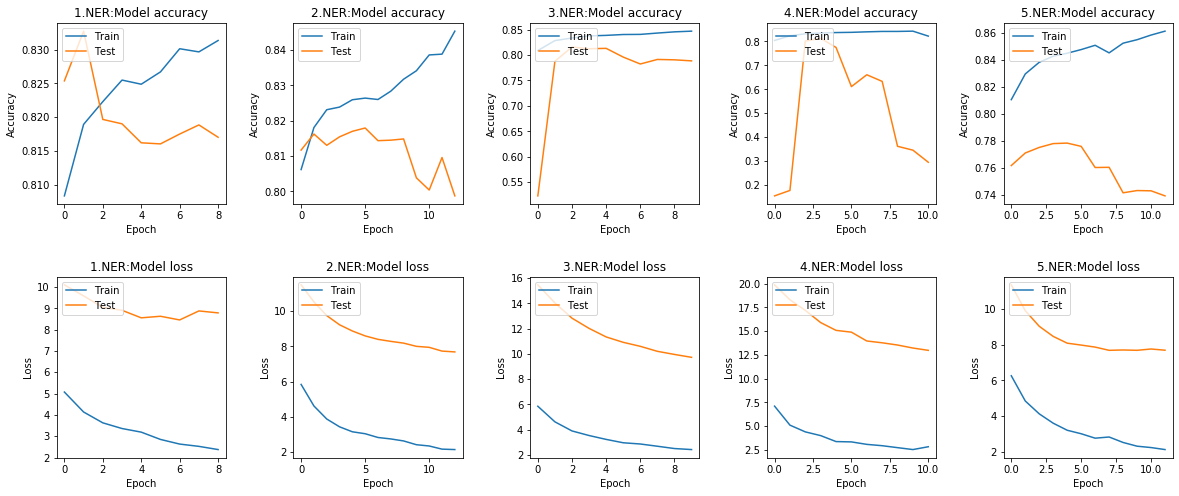

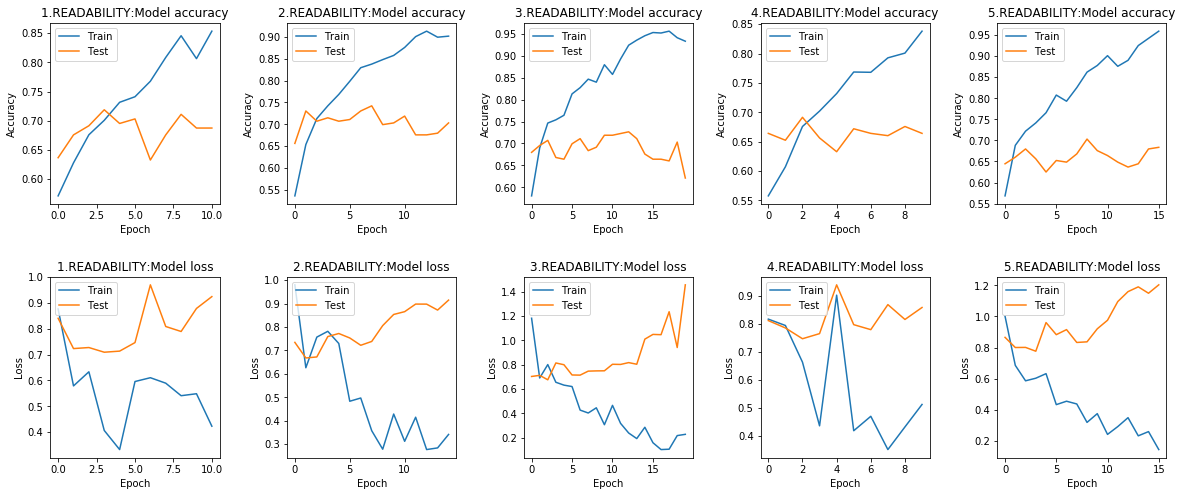

In [5]:
compute_mean_metrics(final_res)
plot_final_res(final_res)